In [29]:
import nltk
import matplotlib.pyplot as plt
import numpy
import matplotlib
nltk.download("popular")
nltk.download("nps_chat")
nltk.download("webtext")
from nltk.book import * 

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Do

In [30]:
nltk.corpus.gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [0]:
 # This command will gather a list of all words in order, including symbols and punctuation marks. 
  emma = nltk.corpus.gutenberg.words('austen-emma.txt')[0:100]

In [32]:
# Concordance shows word occurences within the text. On new works, the following code is required:
emma = nltk.Text(nltk.corpus.gutenberg.words('austen-emma.txt'))
emma.concordance("surprize")

Displaying 25 of 37 matches:
er father , was sometimes taken by surprize at his being still able to pity ` 
hem do the other any good ." " You surprize me ! Emma must do Harriet good : a
Knightley actually looked red with surprize and displeasure , as he stood up ,
r . Elton , and found to his great surprize , that Mr . Elton was actually on 
d aid ." Emma saw Mrs . Weston ' s surprize , and felt that it must be great ,
father was quite taken up with the surprize of so sudden a journey , and his f
y , in all the favouring warmth of surprize and conjecture . She was , moreove
he appeared , to have her share of surprize , introduction , and pleasure . Th
ir plans ; and it was an agreeable surprize to her , therefore , to perceive t
talking aunt had taken me quite by surprize , it must have been the death of m
f all the dialogue which ensued of surprize , and inquiry , and congratulation
 the present . They might chuse to surprize her ." Mrs . Cole had many to agre
the mode of it , the my

In [33]:
# Write a small program to display simple information about all the copora.
# Mean word length, mean sentence length, lexical diversity 
for fileid in gutenberg.fileids():
   num_chars = len(gutenberg.raw(fileid))
   num_words = len(gutenberg.words(fileid))
   num_sents = len(gutenberg.sents(fileid))
   num_vocab = len(set([w.lower() for w in gutenberg.words(fileid)]))
   print (int(num_chars/num_words), int(num_words/num_sents), int(num_words/num_vocab), fileid)

4 24 26 austen-emma.txt
4 26 16 austen-persuasion.txt
4 28 22 austen-sense.txt
4 33 79 bible-kjv.txt
4 19 5 blake-poems.txt
4 19 14 bryant-stories.txt
4 17 12 burgess-busterbrown.txt
4 20 12 carroll-alice.txt
4 20 11 chesterton-ball.txt
4 22 11 chesterton-brown.txt
4 18 10 chesterton-thursday.txt
4 20 24 edgeworth-parents.txt
4 25 15 melville-moby_dick.txt
4 52 10 milton-paradise.txt
4 11 8 shakespeare-caesar.txt
4 12 7 shakespeare-hamlet.txt
4 12 6 shakespeare-macbeth.txt
4 36 12 whitman-leaves.txt


In [34]:
nltk.download('brown')
from nltk.corpus import brown
cfd = nltk.ConditionalFreqDist(
    (genre, word)
    for genre in brown.categories()
    for word in brown.words(categories=genre))
genres = ['news', 'religion', 'hobbies', 'science_fiction', 'romance', 'humor']
modals = ['can', 'could', 'may', 'might', 'must', 'will']
cfd.tabulate(conditions=genres, samples=modals)

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!
                  can could   may might  must  will 
           news    93    86    66    38    50   389 
       religion    82    59    78    12    54    71 
        hobbies   268    58   131    22    83   264 
science_fiction    16    49     4    12     8    16 
        romance    74   193    11    51    45    43 
          humor    16    30     8     8     9    13 


[nltk_data] Downloading package udhr to /root/nltk_data...
[nltk_data]   Package udhr is already up-to-date!


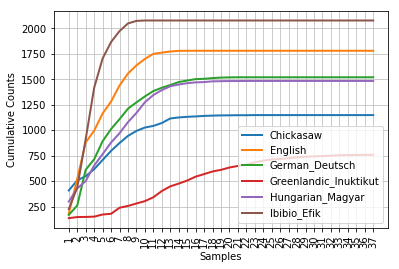

In [35]:
nltk.download('udhr')
from nltk.corpus import udhr
languages = ['Chickasaw', 'English', 'German_Deutsch',
  'Greenlandic_Inuktikut', 'Hungarian_Magyar', 'Ibibio_Efik']
cfd = nltk.ConditionalFreqDist(
  (lang, len(word))
  for lang in languages
  for word in udhr.words(lang + '-Latin1'))
cfd.plot(cumulative=True)

In [0]:
raw_text = udhr.raw('Icelandic_Yslenska-Latin1')

import pandas as pd
languages = ["Icelandic_Yslenska-Latin1"]
cfd = nltk.ConditionalFreqDist(
    (lang, len(word))
    for lang in languages
    for word in udhr.words(lang))

def plot_freq(lang):
    max_length = max([len(word) for word in udhr.words('Icelandic_Yslenska-Latin1')])
    eng_freq_dist = {}

    for i in range(max_length + 1):
        eng_freq_dist[i] = cfd[lang].freq(i)

    ed = pd.Series(eng_freq_dist, name=lang)

    ed.cumsum().plot(legend=True, title='Cumulative Distribution of Word Lengths')

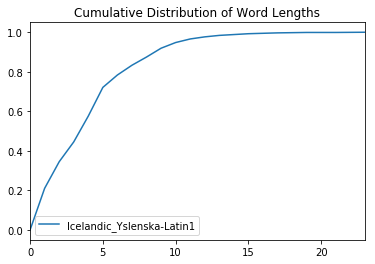

In [37]:
for lang in languages:
  plot_freq(lang)

In [38]:
# How to import and utilize stopwords
nltk.download("stopwords")
from nltk.corpus import stopwords
stopwords.words("english")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [0]:
# Define a function that determines the proportion of non-stop words
# in a text
def content_fraction(text):
  stopwords = nltk.corpus.stopwords.words('english')
  content = [w for w in text if w not in stopwords]
  return (len(content)/len(text))

In [44]:
content_fraction(text3)

0.5998570279689036

In [45]:
# Arpabet pronouncing dictionary and word lookup
entries = nltk.corpus.cmudict.entries()
syllable = ['N', 'IH0', 'K', 'S']
[word for word, pron in entries if pron[-4:] == syllable]

["atlantic's",
 'audiotronics',
 'avionics',
 'beatniks',
 'calisthenics',
 'centronics',
 'chamonix',
 'chetniks',
 "clinic's",
 'clinics',
 'conics',
 'conics',
 'cryogenics',
 'cynics',
 'diasonics',
 "dominic's",
 'ebonics',
 'electronics',
 "electronics'",
 "endotronics'",
 'endotronics',
 'enix',
 'environics',
 'ethnics',
 'eugenics',
 'fibronics',
 'flextronics',
 'harmonics',
 'hispanics',
 'histrionics',
 'identics',
 'ionics',
 'kibbutzniks',
 'lasersonics',
 'lumonics',
 'mannix',
 'mechanics',
 "mechanics'",
 'microelectronics',
 'minix',
 'minnix',
 'mnemonics',
 'mnemonics',
 'molonicks',
 'mullenix',
 'mullenix',
 'mullinix',
 'mulnix',
 "munich's",
 'nucleonics',
 'onyx',
 'organics',
 "panic's",
 'panics',
 'penix',
 'pennix',
 'personics',
 'phenix',
 "philharmonic's",
 'phoenix',
 'phonics',
 'photronics',
 'pinnix',
 'plantronics',
 'pyrotechnics',
 'refuseniks',
 "resnick's",
 'respironics',
 'sconnix',
 'siliconix',
 'skolniks',
 'sonics',
 'sputniks',
 'technics

In [47]:
# Looking through CMU dictionary based on stress patterns
def stress(pron):
  return [char for phone in pron for char in phone if char.isdigit()]
[w for w, pron in entries if stress(pron) == ['0', '1', '0', '2', '0']]

['abbreviated',
 'abbreviated',
 'abbreviating',
 'accelerated',
 'accelerating',
 'accelerator',
 'accelerators',
 'accentuated',
 'accentuating',
 'accommodated',
 'accommodating',
 'accommodative',
 'accumulated',
 'accumulating',
 'accumulative',
 'accumulator',
 'accumulators',
 'accusatory',
 'adenovirus',
 'adjudicated',
 'adjudicating',
 'administrating',
 'administrative',
 'administrator',
 "administrators'",
 "administrator's",
 'administrators',
 'adulterated',
 'adventurism',
 'adventurism',
 'affiliated',
 'affiliated',
 "affiliated's",
 'affiliating',
 'alleviated',
 'alleviated',
 'alleviating',
 'alliteration',
 'alliterative',
 'amalgamated',
 "amalgamated's",
 'amalgamating',
 'ameliorated',
 'ameridata',
 'amoxicillin',
 'anachronism',
 'anachronisms',
 'annihilated',
 'annihilating',
 'antagonism',
 'antagonisms',
 'antagonizing',
 'anticipated',
 'anticipated',
 'anticipating',
 'apologizes',
 'apologizing',
 'apothecary',
 'appreciated',
 'appreciating',
 'apprec

In [48]:
# Working with WordNET, a semantics oriented dictionary
from nltk.corpus import wordnet as wn
wn.synsets('motorcar')

[Synset('car.n.01')]

In [56]:
# Get synonyms
print(wn.synset('car.n.01').lemma_names())
# Define the word
print(wn.synset('car.n.01').definition())
# Get all lemmas for a particular synset
print(wn.synset('car.n.01').lemmas())
# Look up a lemma
print(wn.lemma('car.n.01.automobile'))
# Get synset corresponding to a lemma
print(wn.lemma('car.n.01.automobile').synset())
# Get the "name" of a lemma
print(wn.lemma('car.n.01.automobile').name())

['car', 'auto', 'automobile', 'machine', 'motorcar']
a motor vehicle with four wheels; usually propelled by an internal combustion engine
[Lemma('car.n.01.car'), Lemma('car.n.01.auto'), Lemma('car.n.01.automobile'), Lemma('car.n.01.machine'), Lemma('car.n.01.motorcar')]
Lemma('car.n.01.automobile')
Synset('car.n.01')
automobile


In [58]:
# Look at all synsets for a word (that is, words have multiple senses.
# This command shows all senses of the word and their synsets)
wn.synsets('car')

[Synset('car.n.01'),
 Synset('car.n.02'),
 Synset('car.n.03'),
 Synset('car.n.04'),
 Synset('cable_car.n.01')]

In [59]:
# Access all lemmas involving 'car'
wn.lemmas('car')

[Lemma('car.n.01.car'),
 Lemma('car.n.02.car'),
 Lemma('car.n.03.car'),
 Lemma('car.n.04.car'),
 Lemma('cable_car.n.01.car')]

In [75]:
# WordNet is hierarchical; you can access hyponyms and hypernyms
motorcar = wn.synset('car.n.01')
types_of_motorcar = motorcar.hyponyms()
motorcar.hypernyms()



[Synset('motor_vehicle.n.01')]

In [78]:
sorted([lemma.name() for synset in types_of_motorcar for lemma in synset.lemmas()])

['Model_T',
 'S.U.V.',
 'SUV',
 'Stanley_Steamer',
 'ambulance',
 'beach_waggon',
 'beach_wagon',
 'bus',
 'cab',
 'compact',
 'compact_car',
 'convertible',
 'coupe',
 'cruiser',
 'electric',
 'electric_automobile',
 'electric_car',
 'estate_car',
 'gas_guzzler',
 'hack',
 'hardtop',
 'hatchback',
 'heap',
 'horseless_carriage',
 'hot-rod',
 'hot_rod',
 'jalopy',
 'jeep',
 'landrover',
 'limo',
 'limousine',
 'loaner',
 'minicar',
 'minivan',
 'pace_car',
 'patrol_car',
 'phaeton',
 'police_car',
 'police_cruiser',
 'prowl_car',
 'race_car',
 'racer',
 'racing_car',
 'roadster',
 'runabout',
 'saloon',
 'secondhand_car',
 'sedan',
 'sport_car',
 'sport_utility',
 'sport_utility_vehicle',
 'sports_car',
 'squad_car',
 'station_waggon',
 'station_wagon',
 'stock_car',
 'subcompact',
 'subcompact_car',
 'taxi',
 'taxicab',
 'tourer',
 'touring_car',
 'two-seater',
 'used-car',
 'waggon',
 'wagon']

In [79]:
# Accessing the topmost hierarchical entry for a particular lemma
motorcar.root_hypernyms()

[Synset('entity.n.01')]

In [80]:
# GUI
nltk.app.wordnet()

GetoptError: ignored

In [85]:
# Meronyms are things that belong to a particular entity
wn.synset('tree.n.01').part_meronyms()
# Sybstance meronym is things that make up an entity
wn.synset('tree.n.01').substance_meronyms()
# Member holonyms are what the objects is used to make (trees make up a forest)
wn.synset('tree.n.01').member_holonyms()

[Synset('forest.n.01')]

In [0]:
# Verb entailment, antonymy
wn.synset('eat.v.01').entailments()
wn.lemma('supply.n.02.supply').antonyms()


In [0]:
# Specificity can be quantified with 
wn.synset('baleen_whale.n.01').min_depth()
wn.synset('whale.n.02').min_depth()
wn.synset('vertebrate.n.01').min_depth()

In [89]:
# Using this measure you can check similarity between words
motorcar.path_similarity(wn.synset('baleen_whale.n.01'))

0.05263157894736842

In [0]:
help(wn) # To get the rest of the possible commands